# Generate Adjacency Matrix for Energy Graph


In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
raw_dir = "../data/RE-Europe/"
processed_dir = "../data/processed/"

In [3]:
nodes = pd.read_csv(raw_dir + "Static_data/network_nodes.csv")
nodes2rm = ["26", "28","216","698", "1250", "1251", "1335"]
nodes = nodes.loc[~nodes.ID.isin(nodes2rm)]
nodes

,ID,name,country,voltage,latitude,longitude
0,1,P-1,POR,380,42.094674,-8.113982
1,2,P-2,POR,380,41.587435,-8.326462
2,3,P-3,POR,380,41.585994,-6.722728
3,4,P-4,POR,380,41.597684,-6.342848
4,5,P-5,POR,380,41.373957,-7.350949
...,...,...,...,...,...,...
1489,1510,1510,DEU,380,54.821823,10.093490
1490,1511,1511,DNK,380,54.909546,12.037968
1491,1512,1512,ROU,380,45.788686,28.710582
1492,1513,1513,GRC,138,39.881334,19.857326


In [4]:
edges = pd.read_csv(raw_dir + "Static_data/network_edges.csv")
edges = edges.loc[(~edges.fromNode.isin(nodes2rm)) & (~edges.toNode.isin(nodes2rm))]
edges

,fromNode,toNode,X,Y,numLines,limit,length
0,344,559,0.012030,83.125520,1,1260.0,51.227041
1,344,561,0.015980,62.578223,1,1490.0,34.002397
2,344,336,0.013212,75.687824,2,0.0,25.467094
3,344,566,0.013770,72.621641,1,1320.0,34.755553
4,344,356,0.021120,47.348485,1,0.0,61.628358
...,...,...,...,...,...,...,...
2151,1364,1360,0.073660,13.575889,1,0.0,63.246338
2152,1362,1363,0.004805,208.116545,2,0.0,9.461581
2153,1362,1368,0.076860,13.010669,1,0.0,51.718657
2154,1362,1361,0.009610,104.058273,1,0.0,15.198719


In [5]:
# format edges
e_tuples = list(zip(edges.fromNode, edges.toNode))
e_tuples[:5]

[(344, 559), (344, 561), (344, 336), (344, 566), (344, 356)]

In [6]:
# generate our graph
G=nx.Graph()
G.add_nodes_from(list(nodes.ID))
G.add_edges_from(e_tuples)

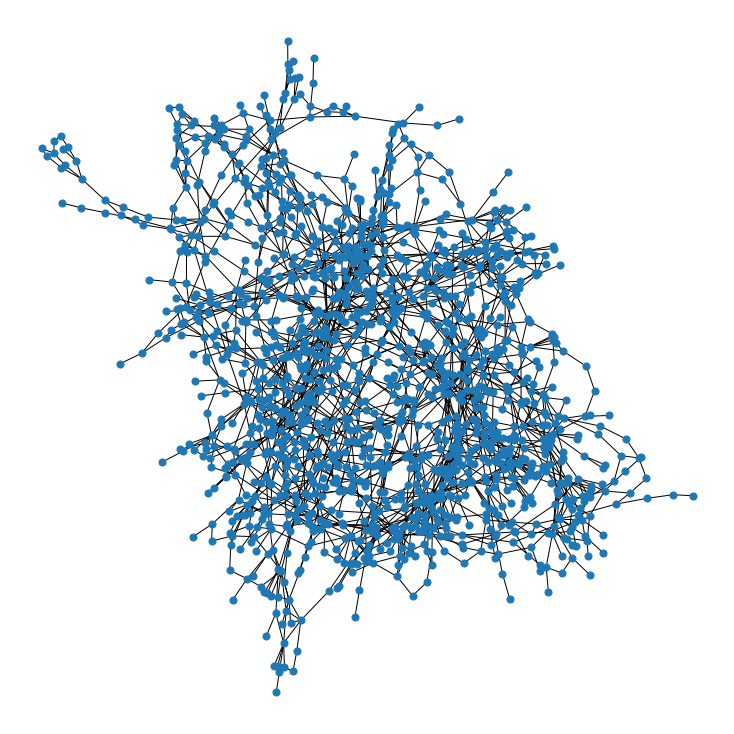

In [7]:
plt.figure(figsize=(10,10))
nx.draw(G, node_size = 50)
plt.show()

In [8]:
# get adjacency matrix
adj_mat = nx.adjacency_matrix(G).todense()
adj_mat

matrix([[0, 1, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [9]:
# save
np.save(processed_dir + "adjacency_matrix.npy", adj_mat)

In [10]:
np.load(processed_dir + "adjacency_matrix.npy")

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])